In [2]:
import pickle
import numpy
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

my_df=pd.read_csv("troop_movements.csv")

,unit_id,location_x,location_y,destination_x,destination_y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,5.357000,5.438000,5.503000,5.535000
std,288.819436,2.813444,2.898026,2.938814,2.857436
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,3.000000,3.000000,3.000000,3.000000
50%,500.500000,5.000000,5.000000,6.000000,6.000000
75%,750.250000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,10.000000,10.000000,10.000000,10.000000


In [4]:
y =(my_df["empire_or_resistance"]=="resistance").sum()
x = (my_df["empire_or_resistance"]=="empire").sum()
data = [['empire',x ], ['resistance', y]]
df = pd.DataFrame(data, columns=['empire_or_resistance', 'count'])

In [5]:
my_df2 = my_df.groupby(['homeworld'])['homeworld'].count()
my_df3

In [6]:
my_df3 = my_df.groupby(['empire_or_resistance'])['empire_or_resistance'].count()
my_df3

empire_or_resistance
empire        494
resistance    506
Name: empire_or_resistance, dtype: int64

In [7]:
my_df4 = my_df.groupby(['unit_type'])['unit_type'].count()
my_df4

unit_type
at-at                 116
at-st                 144
resistance_soldier    122
stormtrooper          134
tie_fighter           112
tie_silencer          137
unknown               113
x-wing                122
Name: unit_type, dtype: int64

In [8]:
check_empire = lambda x: False if x =='empire' else True


my_df['is_resistance'] = my_df['empire_or_resistance'].apply(check_empire)
my_df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-02-06 16:50:28,1,tie_silencer,empire,1,1,3,5,Trandosha,False
1,2024-02-06 16:50:27,2,unknown,resistance,4,10,9,7,Cerea,True
2,2024-02-06 16:50:26,3,x-wing,resistance,2,8,1,7,Socorro,True
3,2024-02-06 16:50:25,4,stormtrooper,empire,9,2,2,3,Zolan,False
4,2024-02-06 16:50:24,5,at-st,empire,3,3,1,2,Vulpter,False
...,...,...,...,...,...,...,...,...,...,...
995,2024-02-06 16:33:53,996,tie_fighter,empire,9,3,4,4,Umbara,False
996,2024-02-06 16:33:52,997,at-st,resistance,2,1,3,4,Trandosha,True
997,2024-02-06 16:33:51,998,x-wing,empire,4,3,5,1,Tholoth,False
998,2024-02-06 16:33:50,999,tie_silencer,resistance,6,9,9,5,Troiken,True


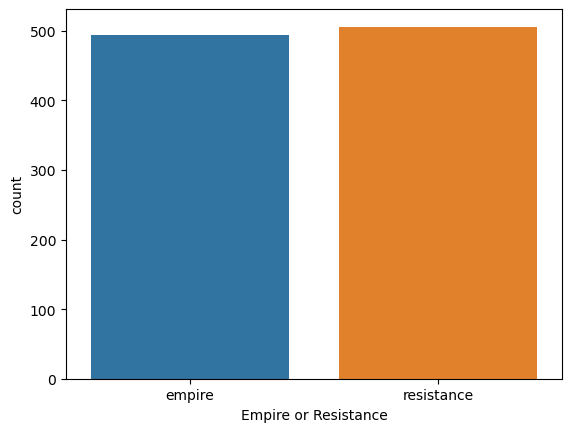

In [9]:
#MATTS WORSE VERSION

y =(my_df["empire_or_resistance"]=="resistance").sum()
x = (my_df["empire_or_resistance"]=="empire").sum()
barplotdf = pd.DataFrame({'Empire or Resistance':["empire", "resistance"], 
                         'count':[x, y]})

valor_plot = sns.barplot(
    data= barplotdf,
    x= 'Empire or Resistance',
    y= 'count')

Text(0, 0.5, 'Count')

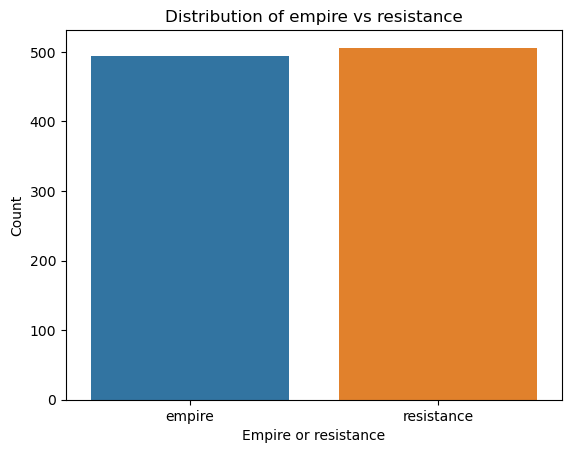

In [10]:
#KAYS BETTER BARPLOT

sns.countplot(data=my_df, x='empire_or_resistance')
plt.title('Distribution of empire vs resistance')
plt.xlabel('Empire or resistance')
plt.ylabel('Count')

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#data = my_df
#data = data.apply(lambda x: pd.factorize(x)[0])
#display(data)

dfe = pd.get_dummies(my_df, columns=['homeworld', 'unit_type'])
display(dfe)

X = dfe.iloc[:, 8:]
y = dfe.is_resistance

X_train, X_test, y_train, y_test,= train_test_split(X, y, test_size=0.2, random_state = 42)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

pred = clf.predict(X_test)
pred

,timestamp,unit_id,empire_or_resistance,location_x,location_y,destination_x,destination_y,is_resistance,homeworld_Alderaan,homeworld_Aleen Minor,...,homeworld_Vulpter,homeworld_Zolan,unit_type_at-at,unit_type_at-st,unit_type_resistance_soldier,unit_type_stormtrooper,unit_type_tie_fighter,unit_type_tie_silencer,unit_type_unknown,unit_type_x-wing
0,2024-02-06 16:50:28,1,empire,1,1,3,5,False,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2024-02-06 16:50:27,2,resistance,4,10,9,7,True,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2024-02-06 16:50:26,3,resistance,2,8,1,7,True,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2024-02-06 16:50:25,4,empire,9,2,2,3,False,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2024-02-06 16:50:24,5,empire,3,3,1,2,False,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-02-06 16:33:53,996,empire,9,3,4,4,False,0,0,...,0,0,0,0,0,0,1,0,0,0
996,2024-02-06 16:33:52,997,resistance,2,1,3,4,True,0,0,...,0,0,0,1,0,0,0,0,0,0
997,2024-02-06 16:33:51,998,empire,4,3,5,1,False,0,0,...,0,0,0,0,0,0,0,0,0,1
998,2024-02-06 16:33:50,999,resistance,6,9,9,5,True,0,0,...,0,0,0,0,0,0,0,1,0,0


array([False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False, False, False,  True,  True, False,
       False,  True,  True,  True, False, False, False,  True, False,
        True,  True,  True, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False,  True,  True,  True, False,  True,
        True,  True,  True, False, False,  True, False, False, False,
        True,  True, False,  True,  True, False, False,  True, False,
       False, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
       False, False, False,  True, False, False, False, False,  True,
        True,  True,

In [12]:
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.605


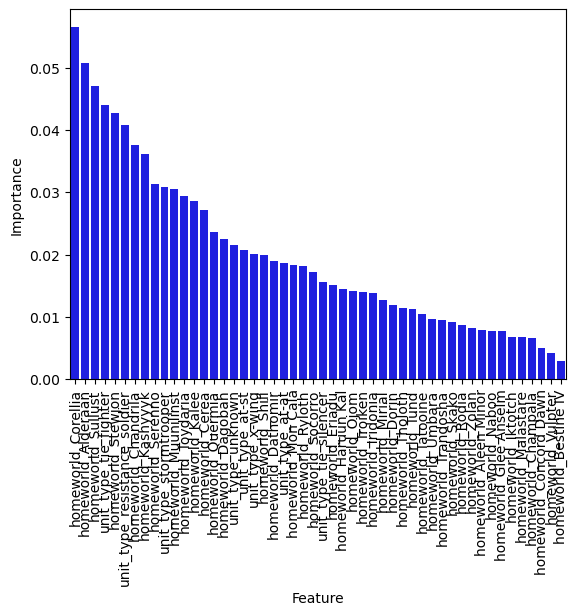

The most Influential Unit Type is homeworld_Corellia


In [13]:
# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': dfe.iloc[:, 8:].columns, 'Importance': importances})

sns.barplot(
    x=feature_importances.Feature, 
    y=feature_importances.Importance, 
    color='b',
    data=feature_importances,
    order=feature_importances.sort_values('Importance',ascending = False).Feature)

plt.xticks(rotation='vertical')
plt.show()
print("The most Influential Unit Type is homeworld_Corellia")

In [14]:
filename = "proj3model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(clf, file)